In [10]:
import pandas as pd

df = pd.read_csv("patient_data.csv")
df.rename(columns={'C': 'Gender'}, inplace=True)

def extract_avg(value):
    value = value.strip().replace(" ", "")
    
    if "-" in value:
        nums = [int(s) for s in value.split("-")]
        return sum(nums) // len(nums)
    
    elif "+" in value:
        return int(value.replace("+", ""))
    
    else:
        return int(value)

df['Systolic'] = df['Systolic'].apply(extract_avg)
df['Diastolic'] = df['Diastolic'].apply(extract_avg)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.to_csv("processed_data.csv", index=False)
print("✅ Preprocessing complete. Saved as processed_data.csv")


✅ Preprocessing complete. Saved as processed_data.csv


In [5]:
df.isna().any()
df.isna().sum()

Gender             0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
dtype: int64

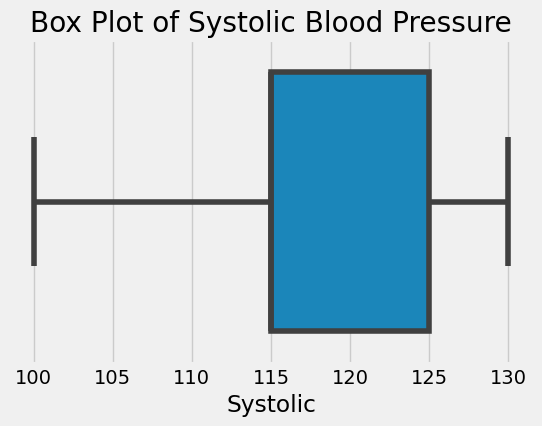

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already read your DataFrame as df
plt.style.use('fivethirtyeight')

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Systolic'])
plt.title("Box Plot of Systolic Blood Pressure")
plt.xlabel("Systolic")
plt.show()


✅ Preprocessing complete. Saved as processed_data.csv


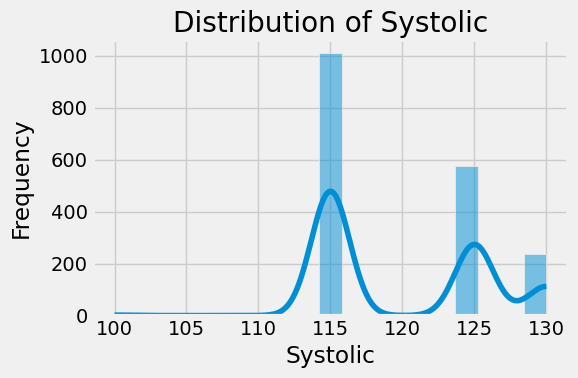

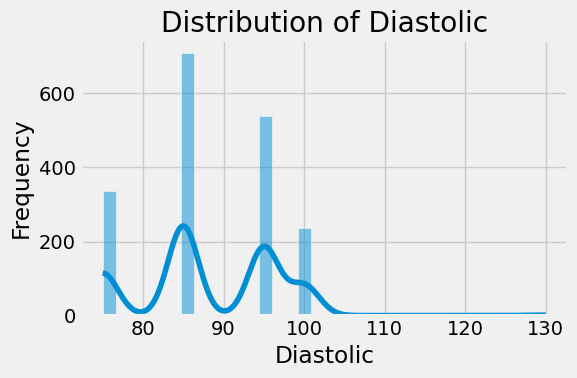

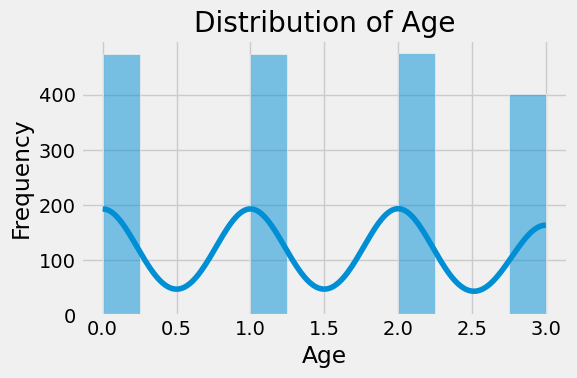

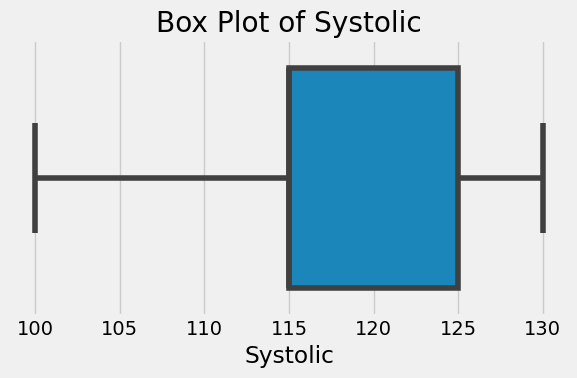

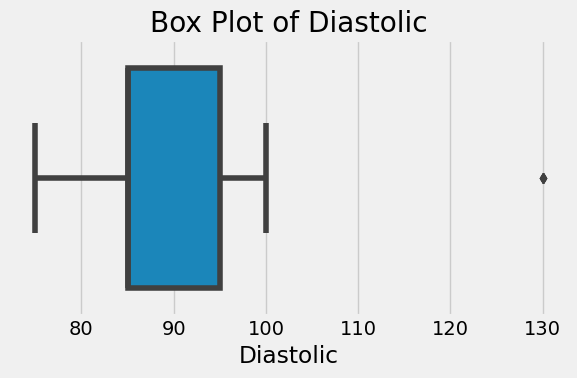

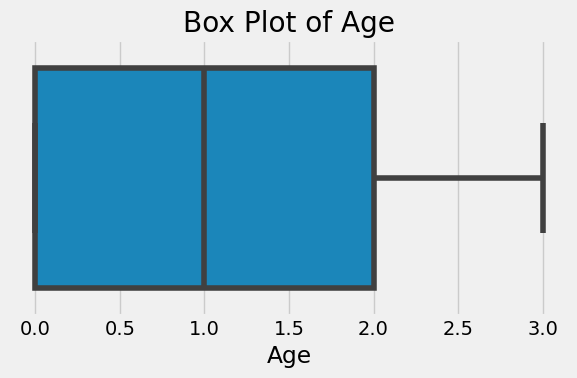

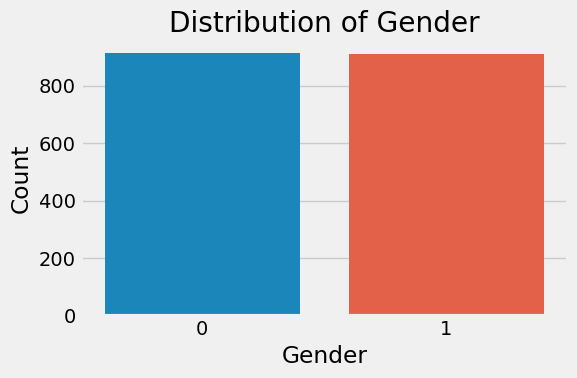

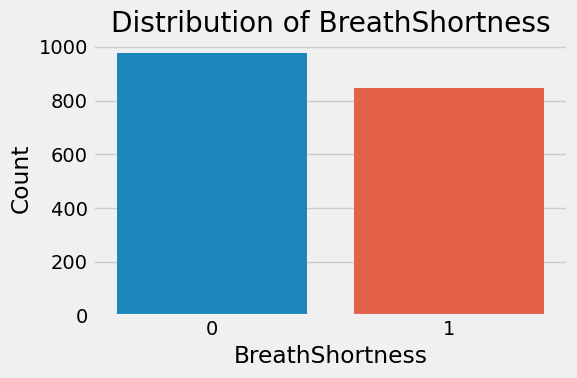

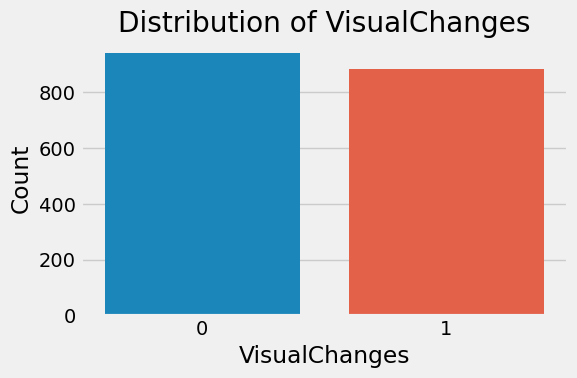

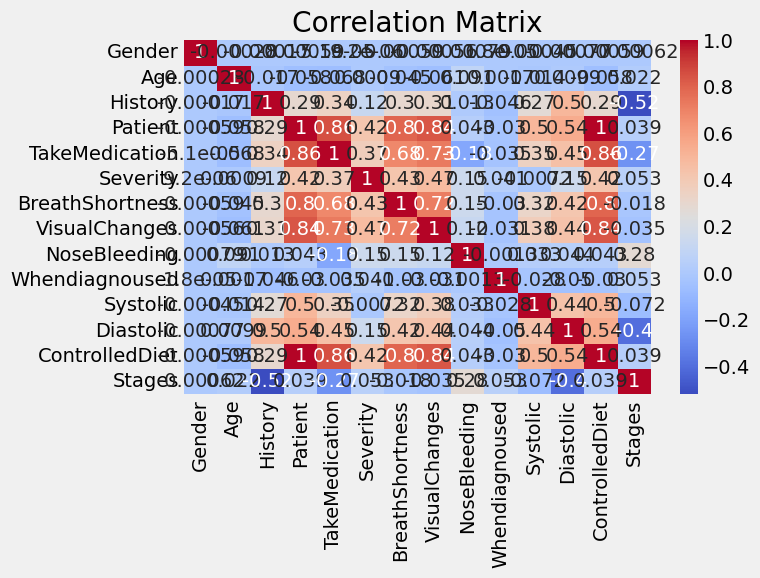

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('fivethirtyeight')

# Read and clean data
df = pd.read_csv("patient_data.csv")
df.rename(columns={'C': 'Gender'}, inplace=True)

def extract_avg(value):
    value = value.strip().replace(" ", "")
    if "-" in value:
        nums = [int(s) for s in value.split("-")]
        return sum(nums) // len(nums)
    elif "+" in value:
        return int(value.replace("+", ""))
    else:
        return int(value)

df['Systolic'] = df['Systolic'].apply(extract_avg)
df['Diastolic'] = df['Diastolic'].apply(extract_avg)

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Save processed data
df.to_csv("processed_data.csv", index=False)
print("✅ Preprocessing complete. Saved as processed_data.csv")

# List of numeric columns to plot
numeric_columns = ['Systolic', 'Diastolic', 'Age']  # Replace or add more as needed

# 1️⃣ Histograms/KDE for numeric columns
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(f"{col}_hist.png")
    plt.show()

# 2️⃣ Boxplots for numeric columns
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.savefig(f"{col}_boxplot.png")
    plt.show()

# 3️⃣ Countplots for categorical columns
categorical_columns = ['Gender', 'BreathShortness', 'VisualChanges']  # Add or adjust based on your data
for col in categorical_columns:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.countplot(x=df[col])
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.savefig(f"{col}_countplot.png")
        plt.show()

# 4️⃣ Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           1825 non-null   int32
 1   Age              1825 non-null   int32
 2   History          1825 non-null   int32
 3   Patient          1825 non-null   int32
 4   TakeMedication   1825 non-null   int32
 5   Severity         1825 non-null   int32
 6   BreathShortness  1825 non-null   int32
 7   VisualChanges    1825 non-null   int32
 8   NoseBleeding     1825 non-null   int32
 9   Whendiagnoused   1825 non-null   int32
 10  Systolic         1825 non-null   int64
 11  Diastolic        1825 non-null   int64
 12  ControlledDiet   1825 non-null   int32
 13  Stages           1825 non-null   int32
dtypes: int32(12), int64(2)
memory usage: 114.2 KB
